In [3]:
'''
import pandas as pd
import os

current_directory = os.getcwd()
excel_path = os.path.join(current_directory, "Data.xlsx")

df = pd.read_excel(excel_path)

# Assuming the SMILES strings are in a column named 'SMILES'
smiles_strings = df['SMILES_1'].dropna()

# Save SMILES strings to a text file, one per line
with open('smiles.txt', 'w') as file:
    for smiles in smiles_strings:
        file.write(f"{smiles}\n")
'''

In [7]:
import numpy as np
import os
current_directory = os.getcwd()
folder_path= os.path.join(current_directory, "embeddings/smiles.npz")
embeddings= np.load(folder_path)

In [2]:
print(embeddings['C1C2C1C1CC21'])

[[-0.00637251 -0.4997336   0.06601784 ... -0.05579593 -0.01776082
  -0.03257341]
 [-1.7118483  -0.53053796  0.5068968  ...  0.02031031 -0.42969894
  -0.67991334]
 [ 0.1710822  -0.85869366  0.5192468  ...  0.4252622  -0.2878713
   0.49242762]
 ...
 [-1.4724995  -0.04720119 -0.10338309 ...  0.98533684 -0.7313121
  -0.27332723]
 [-0.3192383   0.21374047  0.80545384 ...  1.3297244  -0.5247799
   1.4402492 ]
 [-0.32654113 -0.0502249  -0.2293599  ...  0.48999298  0.49752688
   0.91616035]]


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Assuming embeddings is a dictionary with SMILES as keys and embedding vectors as values
# embeddings = {
#     'SMILES_string_1': np.array([...]),
#     'SMILES_string_2': np.array([...]),
#     ...
# }

# Load the Excel file containing SMILES and properties
excel_path= os.path.join(current_directory, "Data.xlsx")
df = pd.read_excel(excel_path)

# Extract the SMILES and properties columns
smiles_list = df['SMILES_1'].values
properties_list = df['H'].values

# Map the embeddings dictionary to match the SMILES in the dataframe
X = []
y = []

for smile, prop in zip(smiles_list, properties_list):
    if smile in embeddings:
        X.append(embeddings[smile].flatten())  # Corresponding embedding vector
        y.append(prop)  # Corresponding property

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the regression model (Linear Regression in this case)
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict the properties on the test set
y_pred = model.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

# Visualize the true vs predicted properties
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Properties')
plt.ylabel('Predicted Properties')
plt.title(f'True vs Predicted Properties (R^2: {r2:.2f})')
plt.show()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (20000,) + inhomogeneous part.

In [3]:
print(embeddings['C1C2C1C1CC21'].shape)

(13, 512)


In [4]:
print(embeddings['C1C2C1C1COCC21'].shape)

(15, 512)


R^2 Score: 0.9892838573179691


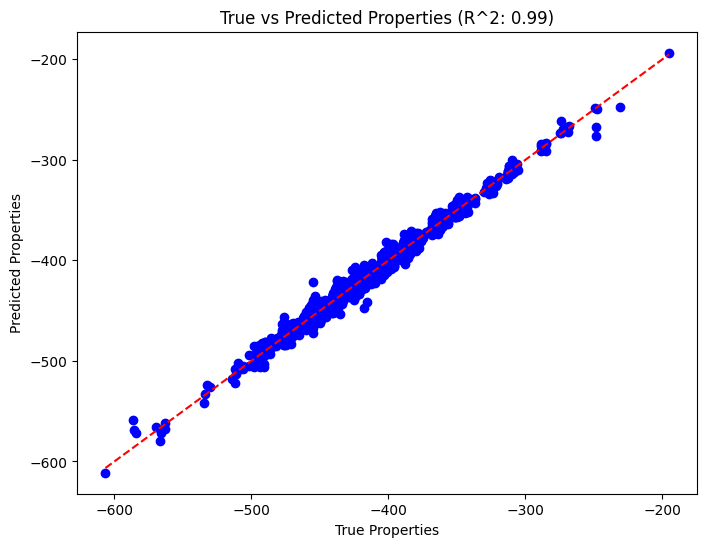

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import os

# Assuming embeddings is a dictionary with SMILES as keys and embedding vectors as values
# embeddings = {
#     'SMILES_string_1': np.array([...]),
#     'SMILES_string_2': np.array([...]),
#     ...
# }

# Load the Excel file containing SMILES and properties
excel_path = os.path.join(current_directory, "Data.xlsx")
df = pd.read_excel(excel_path)

# Extract the SMILES and properties columns
smiles_list = df['SMILES_1'].values
properties_list = df['H'].values

# Map the embeddings dictionary to match the SMILES in the dataframe
X = []
y = []

# Find the maximum length of the embeddings
max_len = max(len(embedding.flatten()) for embedding in embeddings.values())

# Iterate over the SMILES and properties to create homogeneous input data
for smile, prop in zip(smiles_list, properties_list):
    if smile in embeddings:
        # Flatten the embedding and pad to the maximum length
        flattened_embedding = embeddings[smile].flatten()
        padded_embedding = np.pad(flattened_embedding, (0, max_len - len(flattened_embedding)), mode='constant')
        
        X.append(padded_embedding)  # Padded and flattened embedding
        y.append(prop)  # Corresponding property

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the regression model (Linear Regression in this case)
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict the properties on the test set
y_pred = model.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

# Visualize the true vs predicted properties
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Properties')
plt.ylabel('Predicted Properties')
plt.title(f'True vs Predicted Properties (R^2: {r2:.2f})')
plt.show()



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/home/tarak-17/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/tarak-17/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/tarak-17/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/tarak-17/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/home/tarak-17/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/tarak-17/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/tarak-17/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/tarak-17/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File

AttributeError: _ARRAY_API not found

R^2 Score: 0.8339143498856151


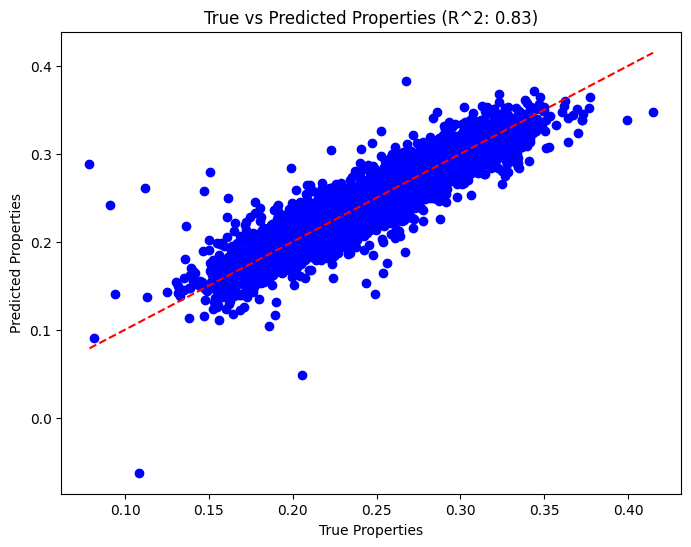

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import os

# Assuming embeddings is a dictionary with SMILES as keys and embedding vectors as values
# embeddings = {
#     'SMILES_string_1': np.array([...]),
#     'SMILES_string_2': np.array([...]),
#     ...
# }

# Load the Excel file containing SMILES and properties
excel_path = os.path.join(current_directory, "Data.xlsx")
df = pd.read_excel(excel_path)

# Extract the SMILES and properties columns
smiles_list = df['SMILES_1'].values
properties_list = df['gap'].values

# Map the embeddings dictionary to match the SMILES in the dataframe
X = []
y = []

# Find the maximum length of the embeddings
max_len = max(len(embedding.flatten()) for embedding in embeddings.values())

# Iterate over the SMILES and properties to create homogeneous input data
for smile, prop in zip(smiles_list, properties_list):
    if smile in embeddings:
        # Flatten the embedding and pad to the maximum length
        flattened_embedding = embeddings[smile].flatten()
        padded_embedding = np.pad(flattened_embedding, (0, max_len - len(flattened_embedding)), mode='constant')
        
        X.append(padded_embedding)  # Padded and flattened embedding
        y.append(prop)  # Corresponding property

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the regression model (Linear Regression in this case)
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict the properties on the test set
y_pred = model.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

# Visualize the true vs predicted properties
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Properties')
plt.ylabel('Predicted Properties')
plt.title(f'True vs Predicted Properties (R^2: {r2:.2f})')
plt.show()


Train R^2 Score: 0.9538742017908644
Test R^2 Score: 0.8458422470494913


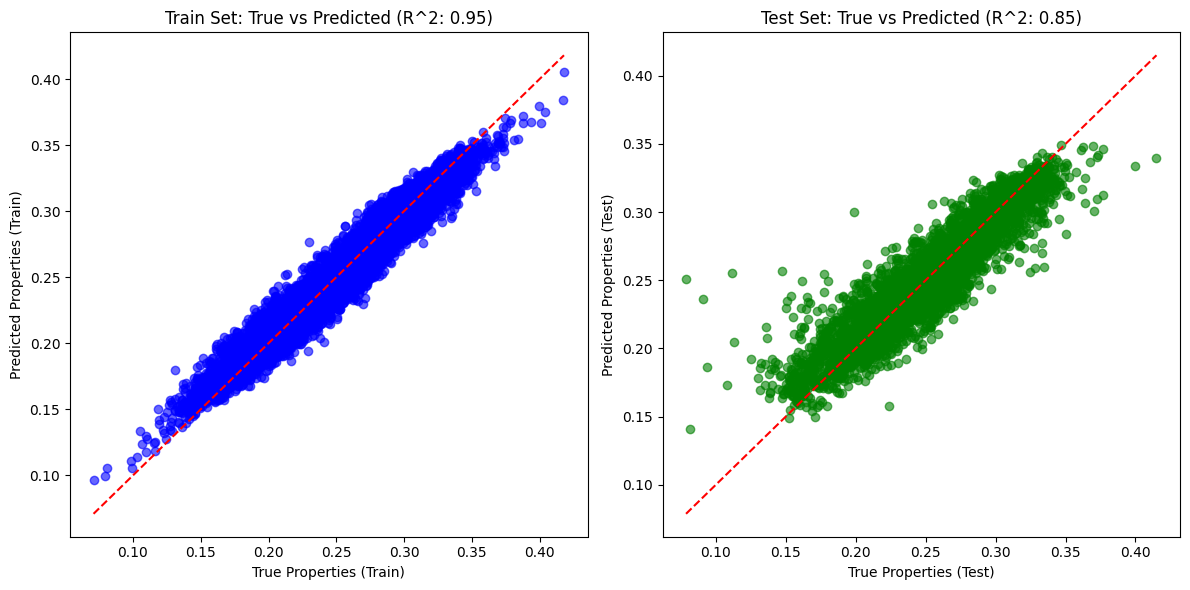

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import os
from xgboost import XGBRegressor

# Assuming embeddings is a dictionary with SMILES as keys and embedding vectors as values
# embeddings = {
#     'SMILES_string_1': np.array([...]),
#     'SMILES_string_2': np.array([...]),
#     ...
# }

# Load the Excel file containing SMILES and properties
excel_path = os.path.join(current_directory, "Data.xlsx")
df = pd.read_excel(excel_path)

# Extract the SMILES and properties columns
smiles_list = df['SMILES_1'].values
properties_list = df['gap'].values

# Map the embeddings dictionary to match the SMILES in the dataframe
X = []
y = []

# Find the maximum length of the embeddings
max_len = max(len(embedding.flatten()) for embedding in embeddings.values())

# Iterate over the SMILES and properties to create homogeneous input data
for smile, prop in zip(smiles_list, properties_list):
    if smile in embeddings:
        # Flatten the embedding and pad to the maximum length
        flattened_embedding = embeddings[smile].flatten()
        padded_embedding = np.pad(flattened_embedding, (0, max_len - len(flattened_embedding)), mode='constant')
        
        X.append(padded_embedding)  # Padded and flattened embedding
        y.append(prop)  # Corresponding property

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regression model
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict the properties on the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R^2 scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Train R^2 Score: {r2_train}')
print(f'Test R^2 Score: {r2_test}')

# Visualize the true vs predicted properties for the training set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('True Properties (Train)')
plt.ylabel('Predicted Properties (Train)')
plt.title(f'Train Set: True vs Predicted (R^2: {r2_train:.2f})')

# Visualize the true vs predicted properties for the test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Properties (Test)')
plt.ylabel('Predicted Properties (Test)')
plt.title(f'Test Set: True vs Predicted (R^2: {r2_test:.2f})')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import os
from xgboost import XGBRegressor

# Load the embeddings
current_directory = os.getcwd()
folder_path = os.path.join(current_directory, "embeddings/smiles.npz")
embeddings = np.load(folder_path, allow_pickle=True)

# Load the Excel file containing SMILES and properties
excel_path = os.path.join(current_directory, "Data.xlsx")
df = pd.read_excel(excel_path)

# Extract the SMILES and properties columns
smiles_list = df['SMILES_1'].values
properties_list = df['gap'].values

# Map the embeddings dictionary to match the SMILES in the dataframe
X = []
y = []

# Find the maximum length of the embeddings
max_len = max(len(embedding.flatten()) for embedding in embeddings.values())

# Iterate over the SMILES and properties to create homogeneous input data
for smile, prop in zip(smiles_list, properties_list):
    if smile in embeddings:
        # Flatten the embedding and pad to the maximum length
        flattened_embedding = embeddings[smile].flatten()
        padded_embedding = np.pad(flattened_embedding, (0, max_len - len(flattened_embedding)), mode='constant')
        
        X.append(padded_embedding)  # Padded and flattened embedding
        y.append(prop)  # Corresponding property

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Select the target property and calculate percentiles
target = 'gap'
Y = df[target]

# Calculate percentiles
q10, q90 = np.percentile(Y, [10, 90])

# Initialize results
r2_scores = []
data_points_10_90 = []

# Iterate over fractions of the 10-90 percentile data
fractions = np.linspace(0.1, 1.0, 10)  # Adjust the fractions as needed

for fraction in fractions:
    # Randomly sample a fraction of data in the 10-90 percentile range
    train_indices = (Y > q10) & (Y <= q90)
    train_subset_indices = train_indices & (np.random.rand(len(Y)) < fraction)
    test_indices = (Y <= q10) | (Y > q90)
    
    # Prepare training and testing sets
    X_train = X[train_subset_indices]
    Y_train = Y[train_subset_indices]
    X_test = X[test_indices]
    Y_test = Y[test_indices]
    
    # Train the XGBoost model
    model = XGBRegressor(random_state=42, n_estimators=100, max_depth=6, learning_rate=0.1)
    model.fit(X_train, Y_train)
    
    # Predict on the test set
    Y_test_pred = model.predict(X_test)
    
    # Calculate R^2 score
    r2_test = r2_score(Y_test, Y_test_pred)
    
    # Store results
    r2_scores.append(r2_test)
    data_points_10_90.append(len(Y_train))

# Plot R^2 vs number of data points in the 10-90 percentile range
plt.figure(figsize=(10, 6))
plt.plot(data_points_10_90, r2_scores, marker='o', linestyle='-', color='b')
plt.title("R^2 vs Number of Data Points in 10-90 Percentile Range")
plt.xlabel("Number of Data Points in 10-90 Percentile Range")
plt.ylabel("R^2 (Test Data)")
plt.grid()
plt.show()




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/home/tarak-17/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/tarak-17/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/tarak-17/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/tarak-17/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/home/tarak-17/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/tarak-17/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/tarak-17/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/tarak-17/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File

AttributeError: _ARRAY_API not found

In [1]:
# Combined Embeddings

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import os
from xgboost import XGBRegressor
from rdkit import Chem
from rdkit.Chem import AllChem

# Load the embeddings (assuming the file contains the embeddings dictionary)
current_directory = os.getcwd()
folder_path = "F:\smiles.npz"
embeddings = np.load(folder_path, allow_pickle=True)

# Load the data
data_path = "E:\\Dream\\Dream Research\\IDDD Project\\Work_December\\Data.xlsx"
df = pd.read_excel(data_path)

# Extract the SMILES and properties columns
smiles_list = df['SMILES_1'].values
properties_list = df['gap'].values

# Initialize lists to store combined features and target values
X = []
y = []

# Find the maximum length of the embeddings for padding
max_len = max(len(embedding.flatten()) for embedding in embeddings.values())

# Iterate over the SMILES and properties to create combined feature vectors
for smile, prop in zip(smiles_list, properties_list):
    if smile in embeddings:
        # Get the molecular embedding
        embedding = embeddings[smile].flatten()
        padded_embedding = np.pad(embedding, (0, max_len - len(embedding)), mode='constant')

        # Get the Morgan fingerprint and convert it to an array
        mol = Chem.MolFromSmiles(smile)
        if mol:
            fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
            fingerprint_array = list(fingerprint)
        else:
            fingerprint_array = np.zeros(2048)  # Placeholder if the SMILES string is invalid
        
        # Combine the molecular embedding and Morgan fingerprint
        combined_feature = np.concatenate([padded_embedding, fingerprint_array])
        
        X.append(combined_feature)  # Combined features
        y.append(prop)  # Corresponding property

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regression model
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict the properties on the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R^2 scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Train R^2 Score: {r2_train}')
print(f'Test R^2 Score: {r2_test}')

# Visualize the true vs predicted properties for the training set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('True Properties (Train)')
plt.ylabel('Predicted Properties (Train)')
plt.title(f'Train Set: True vs Predicted (R^2: {r2_train:.2f})')

# Visualize the true vs predicted properties for the test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Properties (Test)')
plt.ylabel('Predicted Properties (Test)')
plt.title(f'Test Set: True vs Predicted (R^2: {r2_test:.2f})')

plt.tight_layout()
plt.show()


UnpicklingError: Failed to interpret file 'F:\\smiles.npz' as a pickle